# Gaussian Mixture Black-box variational inference (GMBBVI)
This notebook is a brief introduction to the BBVI algorithm proposed in the paper ["Adaptive Exponential Integration for Stable Gaussian Mixture Black-Box Variational Inference"](https://arxiv.org/pdf/2601.14855).

##  Natural Gradient Variational Inference
Consider a posterior distribution $\rho_{\text{post}}(\theta)\propto \exp(-\Phi_R(\theta))$, where $\Phi_R(\theta)=\frac{1}{2}\mathcal{F}(\theta)^T\mathcal{F}(\theta)$, and a variational family of densities $\{ \rho_a \}$ parameterized by $a$. To minimize the KL divergence $\text{KL}(\rho_a||\rho_{\text{post}})$ over the variational family, we introduce a general metric $\langle\cdot, \mathfrak{M}(a) \cdot \rangle$, and the steepest descent direction becomes
$$ -\mathfrak{M}(a)^{-1}\nabla_a  \text{KL}[a \Vert \rho_{\text{post}}] = {\rm argmin}_\sigma \frac{\langle \nabla_a \text{KL}[\rho_{a} \Vert \rho_{\text{post}}] ,  \sigma\rangle}{\sqrt{\langle \sigma,  \mathfrak{M}(a) \sigma \rangle}}.$$
Now we focuses on the Fisher-Rao metric, where the metric tensor is the Fisher information matrix
$$\mathfrak{M}(a) = \mathrm{FIM} (a):= \int  \frac{\partial \log \rho_{a}(\theta)}{\partial a} \frac{\partial \log \rho_{a}(\theta)}{\partial a}^T \rho_a(\theta) \,\mathrm{d} \theta.$$
This gives rise to the concept of natural gradient descent or natural variational inference, which corresponds to the following gradient flow: 
$$  \frac{\mathrm{d} a}{\mathrm{d} t} = -\mathrm{FIM}(a)^{-1}\nabla_a  \mathrm{KL}[\rho_a \Vert \rho_ {\text{post}}]. $$
### Gaussian Approximation
For Gaussian distribution family $rho_a(\theta)=\mathcal{N}(\theta; m, C)$, where $a=[m,C]$, the Fisher information matrix is given by
$$ \mathrm{FIM}(a) = \begin{bmatrix} C^{-1} & \\ & X \end{bmatrix}$$
where $X$ is a 4-th order tensor satisfying $X Y = \frac{1}{4}C^{-1} (Y + Y^T) C^{-1}$ for all $ Y \in \mathbb{R}^{N_{\theta}\times N_{\theta}}$.
This gives the gradient flow 
$$ \dot  m_t = - C_t\mathbb{E}_{\rho_{a_t}}[\nabla \Phi_R ], \qquad
\dot  C_t = C_t - C_t \mathbb{E}_{\rho_{a_t}}[\nabla^2  \Phi_R ]C_t .$$
### Gaussian Mixture Approximation
For Gaussian mixture distribution family 
$$\rho_a^\mathrm{GM}(\theta) = \sum_{k=1}^{K} w_k \mathcal{N}(\theta; m_k, C_k),$$ 
where $a=[m_1, ..., m_k, ..., m_K, C_1. ..., C_k, ..., C_K, w_1, ..., w_k, ..., w_K],$ 
consider the contrained optimization problem 
$${\rm argmin}_\sigma \frac{\langle \nabla_a \text{KL}[\rho_{a} \Vert \rho_{\text{post}}] ,  \sigma\rangle}{\sqrt{\langle \sigma,  \mathrm{FIM}(a) \sigma \rangle}},\quad \text{s.t. } \sum_{k=1}^{K} \sigma_{ \dot{w}_k }=0.$$
Its KKT conditions lead to the following natural gradient flow: 
$$
\begin{bmatrix} \dot{m}_{k} \\ \dot{C}_{k} \\ \dot{w}_{k}  \end{bmatrix}
  =-(\mathrm{FIM}(a))^{-1}
  \begin{bmatrix}
  w_k\int \mathcal{N}_k(\theta) \Bigl( \nabla_{\theta} \log\rho_a^\mathrm{GM}  +\nabla_{\theta} \Phi_R \Bigr)  \,\mathrm{d}\theta
  \\
  \frac{w_k}{2}\int \mathcal{N}_k(\theta) \Bigl(\nabla_{\theta}\nabla_{\theta}\log \rho_a^\mathrm{GM}  + \nabla_{\theta}\nabla_{\theta}\Phi_R\Bigr) \,\mathrm{d}\theta
  \\
  \int \mathcal{N}_k(\theta)
  \bigl(
  \log \rho_a^\mathrm{GM} + \Phi_R 
  \bigr) \,\mathrm{d}\theta  + \lambda
  \end{bmatrix},
$$
where $\mathcal{N}_k(\theta)=\mathcal{N}(\theta;m_k, C_k)$ and $\lambda$ is a Lagrangian multiplier determined by the constraint $\sum_{k=1}^{K} \dot{w}_k =0$.

We approximate the Fisher information matrix by
$$ \mathrm{FIM}(a) \approx \textrm{diag}\left(w_1 C_1^{-1}, ..., w_k C_k^{-1}, ..., w_K C_K^{-1}, w_1X_1, ..., w_kX_k, ..., w_KX_K, \frac{1}{w_1}, ..., \frac{1}{w_k}, ..., \frac{1}{w_K}\right),$$
where $X_k$ is a 4-th order tensor satisfying $X_k Y = \frac{1}{4}C_k^{-1} (Y + Y^T) C_k^{-1}$ for all $ Y \in \mathbb{R}^{N_{\theta}\times N_{\theta}}$.

Finally, we get the following equations:
$$ \begin{aligned}  
\frac{\,\mathrm{d} m_k}{\,\mathrm{d} t} &= -C_k\int \mathcal{N}_k(\theta) \Bigl( \nabla_{\theta} \log\rho_a^{\rm GM}  +  \nabla_{\theta} \Phi_R \Bigr)  \,\mathrm{d}\theta \\
&= -\mathbb{E}_{\mathcal{N}_k}\Bigl[ \theta \bigl(\log\rho_a^{\rm GM} + \Phi_R - \mathbb{E}_{\mathcal{N}_k}[\log\rho_a^{\rm GM} + \Phi_R] \bigr)\Bigr],  \\
\frac{\,\mathrm{d} C_{k}^{-1}}{\,\mathrm{d} t} &=   \int \mathcal{N}_k(\theta) \bigl(\nabla_{\theta}\nabla_{\theta}\log \rho_a^{\rm GM}  + \nabla_{\theta}\nabla_{\theta}\Phi_R\bigr) \,\mathrm{d}\theta  \\
&= -\mathbb{E}_{\mathcal{N}_k}\Bigl[(\theta - m_k)(\theta - m_k)^T \bigl(\log \rho_a^{\rm GM}  + \Phi_R - \mathbb{E}_{\mathcal{N}_k}[\log\rho_a^{\rm GM} + \Phi_R]\bigr)\Bigr],\\
\frac{\,\mathrm{d} \log w_{k}}{\,\mathrm{d} t} &= -\int \Bigl(\mathcal{N}_k(\theta) -  \rho_a^{\rm GM}\Bigr)\bigl(\log \rho_a^{\rm GM}  + \Phi_R \bigr) \,\mathrm{d}\theta,
\end{aligned}
$$
where $\mathcal{N}_k = \mathcal{N}(\theta; m_k, C_k)$ denotes the $k$-th Gaussian component.


##  Gaussian Mixture Black Box Variational Inference
We introduce an adaptive exponential integration for stable Gaussian mixture black-box variational inference. To stabilize GMBBVI, we first reparameterize covariance matrices via Cholesky decomposition to convert expectations over component-specific Gaussians into expectations over the standard Gaussian distribution $\mathcal{N}(0,I)$. An exponential integrator is used for covariance updates to guarantee positive definiteness, while mean/weight updates rely on the forward Euler method. All required expectations are approximated via Monte Carlo sampling, and adaptive time-stepping is implemented to balance efficiency and stability. Annealing-based initialization is further added to enhance exploration for multimodal/heavy-tailed posteriors.

### 1. Reparameterized Differential Equations
Covariance matrices are reparameterized as $C_k = L_k L_k^T$ (where $L_k$ is the Cholesky factor) to rewrite the natural gradient flow equations for Gaussian mixture components in terms of $\mathcal{N}(0,I)$. The key differential equations for the mean $m_k$, covariance $C_k$, and log-weight $\log w_k$ are
$$
\begin{cases}
\frac{\mathrm{d} m_k}{\mathrm{d} t} = -L_k \mathbb{E}_{\mathcal{N}}\left[\theta \left(f_k - \mathbb{E}_{\mathcal{N}}[f_k]\right)\right], \\
\frac{\mathrm{d} C_k}{\mathrm{d} t} = -L_k \mathbb{E}_{\mathcal{N}}\left[\theta\theta^T \left(f_k - \mathbb{E}_{\mathcal{N}}[f_k]\right)\right]L_k^T, \\
\frac{\mathrm{d} \log w_k}{\mathrm{d} t} = -\mathbb{E}_{\mathcal{N}}[f_k] + \sum_{i=1}^K w_i \mathbb{E}_{\mathcal{N}}[f_i].
\end{cases}
$$
Here, $f_k(t,\theta) = \log \rho_{a(t)}^{\rm GM}(L_k(t)\theta + m_k(t)) + \Phi_R(L_k(t)\theta + m_k(t))$, with $\rho_{a(t)}^{\rm GM}$ denoting the Gaussian mixture distribution at time $t$ and $\Phi_R$ representing the log unnormalized posterior.

### 2. Exponential Integrator for Covariance Update
Large time steps can cause covariance matrices to lose positive definiteness and numerical stability. To address this, we define $E_k(t) = \mathbb{E}_{\mathcal{N}}\left[\theta\theta^T \left(f_k(t,\theta) - \mathbb{E}_{\mathcal{N}}[f_k(t,\theta)]\right)\right]$ and select step size $\Delta t_n$ adaptively:
$$
\Delta t_n = \min\left\{\Delta t_{\max}\,\eta(t_n), \frac{\beta}{\max_k \|E_k(t_n)\|_2}\right\}.
$$
In this formula, $\Delta t_{\max}$ is the maximum allowed step size, $\beta$ is a stability parameter, and $\eta(t_n)$ is a cosine decay scheduler (decaying from 1 to $\eta_{\rm min}$ after half of total iterations) to reduce Monte Carlo noise effects.
Further, we use an exponential integrator for covariance updates, which ensures positive definiteness unconditionally (regardless of the square-root factorization choice):
$$
C_k(t_n + \Delta t_n) = L_k(t_n)e^{-E_k(t_n)\Delta t_n}L_k(t_n)^T.
$$

### 3. Forward Euler Update for Mean and Weight
Mean and log-weight are updated via the forward Euler method to maintain consistency with the covariance update rule:
$$
\begin{cases}
m_k(t_n+\Delta t_n) = m_k(t_n) - \Delta t_n L_k(t_n)\mathbb{E}_{\mathcal{N}}\left[\theta \left(f_k(t_n,\theta) - \mathbb{E}_{\mathcal{N}}[f_k(t_n,\theta)]\right)\right], \\
\log w_k(t_n+\Delta t_n) = \log w_k(t_n) - \Delta t_n\left(\mathbb{E}_{\mathcal{N}}[f_k(t_n,\theta)] - \sum_i w_i \mathbb{E}_{\mathcal{N}}[f_i(t_n,\theta)]\right)
\end{cases}
$$



##  Theoretical Analysis
We analyze the proposed Gaussian Mixture Black-Box Variational Inference (GMBBVI) algorithm from two core perspectives: discrete-level convergence (with/without Monte Carlo noise) and connection to manifold optimization and mirror descent, which further guarantees affine invariance of GMBBVI.

### 1. Convergence Study (Gaussian Case, $K=1$)
We first focus on the single-component Gaussian case ($\Phi_R(\theta)=\frac{1}{2}(\theta - m_{\star})^TC_{\star}^{-1}(\theta - m_{\star})$, quadratic log-unnormalized posterior) and define **normalized variables** to simplify convergence analysis:
- $\Sigma_n = C_{\star}^{-\frac{1}{2}}C(t_n)C_{\star}^{-\frac{1}{2}}$: Normalized covariance matrix (scaled by the target covariance $C_\star$ to measure deviation from the target)
- $v_n = C_{\star}^{-\frac{1}{2}}(m(t_n) - m_\star)$: Normalized mean vector
- $\mathrm{L}_n = C_{\star}^{-\frac{1}{2}} L(t_n)$: Scaled square-root factor of $C(t_n)$

The mean/covariance updates simplify to:  
$$v_{n+1} = (I-\Delta t_n \Sigma_n)v_n, \quad \Sigma_{n+1} = \mathrm{L}_n e^{\Delta t_n(-\mathrm{L}_n^T \mathrm{L}_n+I)} \mathrm{L}_n^T,$$  
with adaptive time step $\Delta t_n = \min\bigl\{\Delta t_{\max}, \frac{\beta}{\|\Sigma_n-I\|_2}\bigr\}$. 

Then $\Sigma_n \to I$ and $v_n \to 0$ exponentially fast in $\mathcal{O}\bigl(|\ln \lambda_{\min}(\Sigma_0)| + |\ln \lambda_{\max}(\Sigma_0)| + \max\{\ln\|v_0\|_2, 0\} + \ln \frac{1}{\epsilon} \bigr)$ iterations.

Monte Carlo sampling introduces stochastic errors:
- $\Omega_n$: Zero-mean symmetric noise matrix (covariance update error)
- $\widetilde{w}_n$: Zero-mean vector (mean update error)

The perturbed updates become
$$v_{n+1} = v_n - \Delta t_n \left( \mathrm{L}_n(\mathrm{L}_n^Tv_n + \widetilde{w}_n) \right), \quad \Sigma_{n+1}= \mathrm{L}_n e^{\Delta t_n(-\mathrm{L}_n^T \mathrm{L}_n+I+\Omega_n)} \mathrm{L}_n^T.$$  
With adaptive time step $\Delta t_n= \min\{\eta(t_n) \Delta t_{\max},\frac{\beta}{\|-\mathrm{L}_n^T \mathrm{L}_n+I+\Omega_n\|_2}\}$, where $\eta(t_n)$ is scheduler satisfying $\sum_n\eta(t_n)=+\infty$ and $\sum_n\eta(t_n)^2<+\infty$, **almost sure convergence** holds: $\Sigma_n \to I$ and $v_n \to 0$. The scheduler controls noise-induced instability while maintaining convergence.


### 2. Manifold Optimization & Mirror Descent
We interpret the exponential update of the covariance matrix as $C_k$ walking along geodesic on the Riemannian manifold of symmetric positive definite (SPD) matrices $\mathcal{S}_{++}$. 
Then the GMBBVI algorithm is equivalent to constrained mirror descent:  
$$a_{n+1} = {\rm argmin}_{a}\left\{ \left\langle \nabla_{a}{\rm KL}[\rho_a^{\rm{GM}} \Vert \pi]|_{a_n}, a-a_n\right\rangle + \frac{1}{\Delta t_n}D_{\phi_n}(a,a_n) \right\} \quad{\rm s.t.} \quad \sum_{k=1}^{K} w_k = 1,$$  
where $a =[m_1, ..., m_K, C_1, ..., C_K, w_1, ..., w_K]$ and $D_{\phi_n}(x,y) = \phi_n(x) - \phi_n(y) - \nabla \phi_n(y)^T (x-y)$ is the Bregman divergence. The generator function
$$
\phi_n(a) = \sum_{k=1}^{K} \left( \frac{w_{k,n}}{2} {\rm tr}(S_{k,n}\log S_{k,n} - S_{k,n}) + \frac{w_{k,n}}{2}m_k^T C_{k,n}^{-1} m_k +  w_k \log w_k \right),
$$
where $S_{k,n} = C_{k,n}^{-\frac{1}{2}} C_k  C_{k,n}^{-\frac{1}{2}}$. This result further indicates the affine invariance property of GMBBVI.


## Annealing-Based Initialization
For multimodal or heavy-tailed posteriors, annealing modifies the KL-divergence objective to prioritize exploration in early iterations, preventing Gaussian components from being trapped in local modes. The annealed objective is:
$$
\min_{\rho_a} \ \mathbb{E}_{\rho_a}[\log \rho_a] + \frac{1}{T} \mathbb{E}_{\rho_a}[\Phi_R]
$$
Here, $T \ge 1$ is the temperature parameter, which exponentially decays from $T_{\text{start}}$ to 1 over $N_\alpha$ iterations: $T_n = T_{\text{start}}^{\frac{N_\alpha-n}{N_\alpha-1}}$. $T_{\text{start}}$ is chosen to ensure entropy-driven updates dominate initially, enabling robust exploration of the posterior landscape:
$$
\left\| \frac{1}{T_{\text{start}}} \widetilde{\nabla}_{m} \mathbb{E}_{\rho_a}[\Phi_R] \right\| \le \alpha \cdot \| \widetilde{\nabla}_{m} \mathbb{E}_{\rho_a}[\log \rho_a] \|,
$$
where $\alpha \in (0,1)$ is a small constant, and $\widetilde{\nabla}_{m} $ denotes the natural gradient with respect to means $m_1,\cdots,m_K$, using the block-diagonal approximation of the Fisher information matrix.

## 10D Numercial Example
In this part, we apply the DF-GMVI algorithm to approximate the distribution that follows the Rosenbrock function, which has a characteristic “banana” shape. That is, the posterior $\rho_{\text{post}}([\theta, \theta^c])\propto \exp(-\Phi_R(\theta,\theta^c))$, with 
$$ 
\mathcal{F}(\theta) = 
\frac{1}{\sqrt{10}}\Bigl(y - \begin{bmatrix}
10(\theta_{(2)} -  \theta_{(1)}^2)\\
\theta_{(1)}
\end{bmatrix}\Bigr)
\quad \textrm{ and }\quad 
y= 
\begin{bmatrix}
0\\
1
\end{bmatrix},
$$
$\Phi_R(\theta,\theta^c) = \frac{1}{2}\mathcal{F}(\theta)^T\mathcal{F}(\theta) + \frac{1}{2} (\theta^c-K\theta)^T (\theta^c-K\theta)$, where $\theta \in \mathbb{R}^2, \theta^c \in \mathbb{R}^{N_\theta - 2}$.
We apply GMBBVI with $K = 10, 20$ and $40$ modes and $N_\theta = 10$, each randomly initialized as $m_i \sim \mathcal{N}(0,I), C_i=I$ with equal weights. We set the annealing hyperparameter $\alpha=0.1$, the maximum step size $\Delta t_{\text{max}}=0.9$. We run the algorithm for 500 iterations. The density estimations at the 500th iteration and the errors in terms of total variation over the iterations are shown in the following pictures.

In [1]:
using Random
using Distributions
using LinearAlgebra
include("../Inversion/Plot.jl")
include("../Inversion/GaussianMixture.jl")
include("../Inversion/GMBBVI.jl")
include("../Inversion/AnnealingInitialize.jl")
include("../Derivative-Free-Variational-Inference/MultiModal.jl")
Random.seed!(111);

[ Info: ("initialize_with_annealing: T_start = ", 1091.9233353613083, "T_end = ", 1.0, ", scheduler_type = ", "exponential_decay")
[ Info: ("iter = ", 50, " / ", 500)
[ Info: ("iter = ", 100, " / ", 500)
[ Info: ("iter = ", 150, " / ", 500)
[ Info: ("iter = ", 200, " / ", 500)
[ Info: ("iter = ", 250, " / ", 500)
[ Info: ("iter = ", 300, " / ", 500)
[ Info: ("iter = ", 350, " / ", 500)
[ Info: ("iter = ", 400, " / ", 500)
[ Info: ("iter = ", 450, " / ", 500)
[ Info: ("iter = ", 500, " / ", 500)
[ Info: ("initialize_with_annealing: T_start = ", 1017.7655451438887, "T_end = ", 1.0, ", scheduler_type = ", "exponential_decay")
[ Info: ("iter = ", 50, " / ", 500)
[ Info: ("iter = ", 100, " / ", 500)
[ Info: ("iter = ", 150, " / ", 500)
[ Info: ("iter = ", 200, " / ", 500)
[ Info: ("iter = ", 250, " / ", 500)
[ Info: ("iter = ", 300, " / ", 500)
[ Info: ("iter = ", 350, " / ", 500)
[ Info: ("iter = ", 400, " / ", 500)
[ Info: ("iter = ", 450, " / ", 500)
[ Info: ("iter = ", 500, " / ", 500)


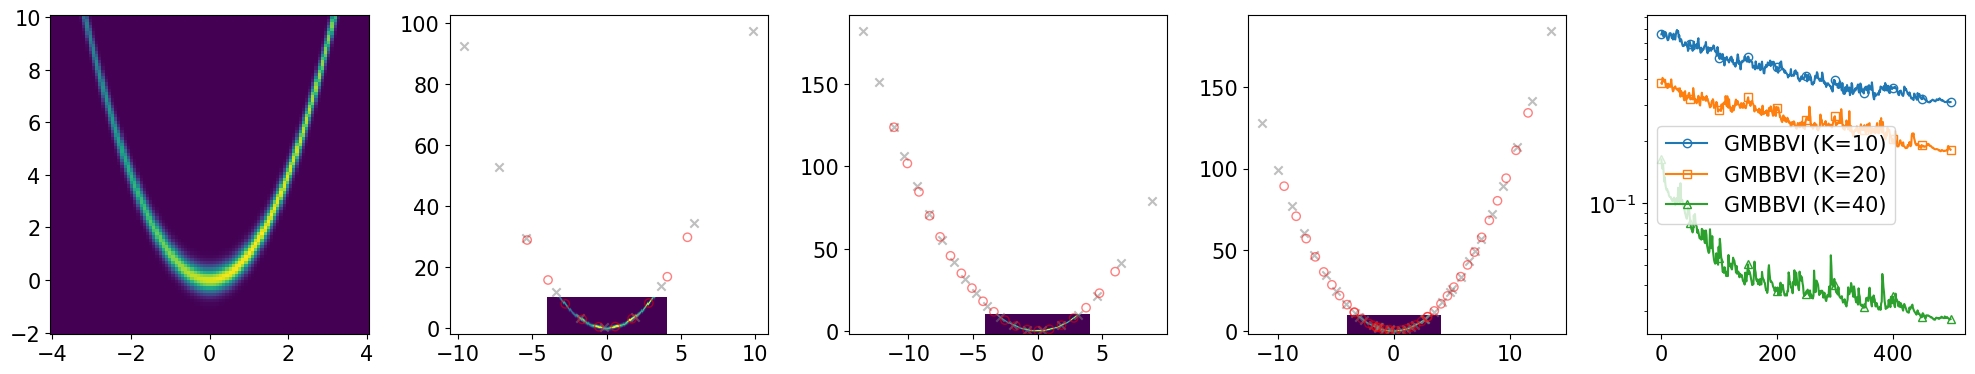

In [2]:
Gtype = "Banana"
N_x = 10
N_ens = 4 * N_x
ση = [sqrt(10.0); sqrt(10.0); ones(N_x-2)]
λ = 10.0
y = [0.0; 1.0; zeros(N_x-2)]

func_args = (y[1:N_x], ση[1:N_x], λ , Gtype)
func_Phi(x) = Phi(x, func_args)

func_marginal_args = (y[1:2], ση[1:2], λ, Gtype)
func_Phi_marginal(x) = Phi(x, func_marginal_args)

N_modes_array = [10; 20; 40]

N_modes = N_modes_array[end]
x0_w  = ones(N_modes)/N_modes
μ0, Σ0 = zeros(N_x), Matrix(I(N_x)) 
x0_mean, xx0_cov = zeros(N_modes, N_x), zeros(N_modes, N_x, N_x)
for im = 1:N_modes
    x0_mean[im, :]    .= rand(MvNormal(zeros(N_x), Σ0)) + μ0
    xx0_cov[im, :, :] .= Σ0
end

fig, ax = PyPlot.subplots(nrows=1, ncols=length(N_modes_array)+2, sharex=false, sharey=false, figsize=(20,4))

N_iter = 500
Nx, Ny = 100,100
dt = 0.9
quadrature_type = "random_sampling"

objs = []
for N_modes in N_modes_array
    x0_w_anneal, x0_mean_anneal, xx0_cov_anneal = initialize_with_annealing(func_Phi, x0_w[1:N_modes], x0_mean[1:N_modes,:], xx0_cov[1:N_modes,:,:]; N_ens = N_ens, scheduler_type = "exponential_decay", N_iter=500)
    obj = Gaussian_mixture_GMBBVI(func_Phi, x0_w_anneal, x0_mean_anneal, xx0_cov_anneal;
        N_iter = N_iter, dt = dt, N_ens = N_ens, quadrature_type = quadrature_type)
    push!(objs, obj)
end
visualization_2d(ax ; Nx = Nx, Ny = Ny, x_lim=[-4.0, 4.0], y_lim=[-2.0, 10.0], func_Phi=func_Phi_marginal, objs=objs,label="GMBBVI")

fig.tight_layout()